In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import matplotlib.pyplot as plt

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

%matplotlib widget

In [2]:
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from LinearMPC_template.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl

rocket_obj_path     = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path  = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 1/20
H  = 20.0
Tf = 20.0

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

xs, us = mpc.xs, mpc.us


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



In [4]:
OPEN_STYLE  = dict(linestyle="--", linewidth=2.5, alpha=0.85, marker="o", markersize=3, markevery=10)
CLOSED_STYLE = dict(linestyle="-", linewidth=1.8, alpha=0.95)

def _apply_grid_legend(ax):
    ax.grid(True)
    ax.legend()

In [5]:
def run_position_tracking_test(pos0: np.ndarray, pos_target: np.ndarray, roll_target: float = 0.0, sim_method="linear", animate=False):
    x0 = xs.copy()

    x0[9:12] = np.asarray(pos0, float).reshape(3,)
    x0[5]    = float(roll_target)

    pos_controller = PIControl(np.asarray(pos_target, float).reshape(3,))

    x_target = np.zeros(12)
    x_target[5] = float(roll_target)

    t_cl, x_cl, u_cl, t_ol_hist, x_ol_hist, u_ol_hist, ref = rocket.simulate_control(
        mpc, Tf, H, x0, method=sim_method, x_target=x_target, pos_control=pos_controller
    )

    t_u = t_cl[:-1]

    fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
    axs[0].set_title("Position tracking with PI position loop + MPC velocity controllers")

    axs[0].plot(t_cl, x_cl[9, :], label="x [m]", **CLOSED_STYLE)
    axs[0].plot(t_cl, x_cl[10, :], label="y [m]", **CLOSED_STYLE)
    axs[0].plot(t_cl, x_cl[11, :], label="z [m]", **CLOSED_STYLE)
    axs[0].set_ylabel("pos [m]")
    _apply_grid_legend(axs[0])

    axs[1].plot(t_cl, x_cl[6, :], label="vx [m/s]", **CLOSED_STYLE)
    axs[1].plot(t_cl, x_cl[7, :], label="vy [m/s]", **CLOSED_STYLE)
    axs[1].plot(t_cl, x_cl[8, :], label="vz [m/s]", **CLOSED_STYLE)
    axs[1].plot(t_cl, x_cl[5, :], label="γ [rad]", **CLOSED_STYLE)
    axs[1].axhline(float(roll_target), color="k", linestyle=":", linewidth=1.2)
    axs[1].set_ylabel("v, γ")
    _apply_grid_legend(axs[1])

    axs[2].plot(t_u, u_cl[0, :], label="δ1 [rad]", **CLOSED_STYLE)
    axs[2].plot(t_u, u_cl[1, :], label="δ2 [rad]", **CLOSED_STYLE)
    axs[2].plot(t_u, u_cl[2, :], label="Pavg [%]", **CLOSED_STYLE)
    axs[2].plot(t_u, u_cl[3, :], label="Pdiff [%]", **CLOSED_STYLE)
    axs[2].set_ylabel("u")
    _apply_grid_legend(axs[2])

    ex = x_cl[9, :]  - pos_target[0]
    ey = x_cl[10, :] - pos_target[1]
    ez = x_cl[11, :] - pos_target[2]
    eg = x_cl[5, :]  - float(roll_target)

    axs[3].plot(t_cl, ex, label="x error [m]", **CLOSED_STYLE)
    axs[3].plot(t_cl, ey, label="y error [m]", **CLOSED_STYLE)
    axs[3].plot(t_cl, ez, label="z error [m]", **CLOSED_STYLE)
    axs[3].plot(t_cl, eg, label="γ error [rad]", **CLOSED_STYLE)
    axs[3].set_ylabel("error")
    axs[3].set_xlabel("t [s]")
    _apply_grid_legend(axs[3])

    fig.tight_layout()

    if animate:
        vis = RocketVis(rocket, rocket_obj_path)
        vis.anim_rate = 1.0
        vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, Ref=ref)

    return t_cl, x_cl, u_cl, ref

Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
Simulating time 0.75: 
Simulating time 0.80: 
Simulating time 0.85: 
Simulating time 0.90: 
Simulating time 0.95: 
Simulating time 1.00: 
Simulating time 1.05: 
Simulating time 1.10: 
Simulating time 1.15: 
Simulating time 1.20: 
Simulating time 1.25: 
Simulating time 1.30: 
Simulating time 1.35: 
Simulating time 1.40: 
Simulating time 1.45: 
Simulating time 1.50: 
Simulating time 1.55: 
Simulating time 1.60: 
Simulating time 1.65: 
Simulating time 1.70: 
Simulating time 1.75: 
Simulating time 1.80: 
Simulating time 1.85: 
Simulating time 1.90: 
Simulating time 1.95: 
Simulating time 2.00: 
Simulating time 2.05: 
Simulating time 2.10: 
Simulating 

(array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
         0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
         1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
         1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
         2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
         2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
         3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
         3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
         4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
         4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
         4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
         5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
         5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
      

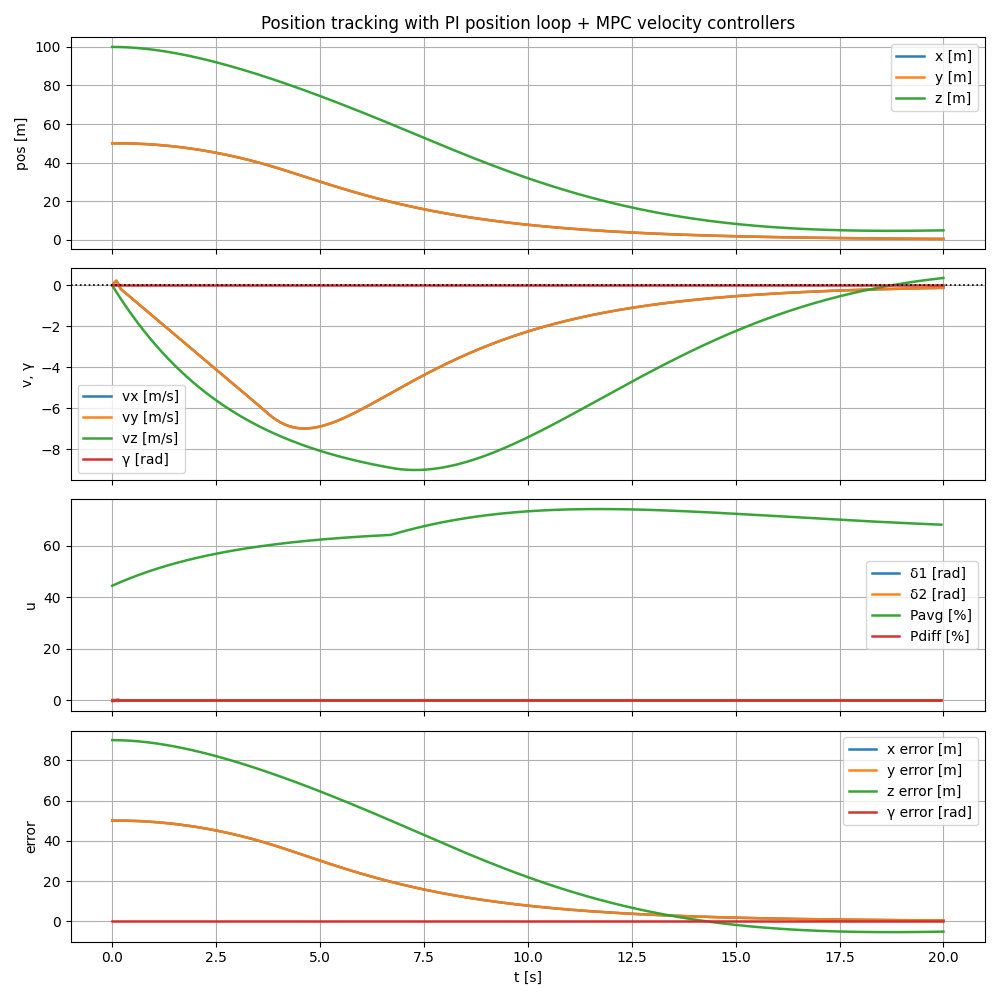

In [7]:
pos0 = np.array([50.0, 50.0, 100.0])
pos_target = np.array([0.0, 0.0, 10.0])
roll_target = 0.0

run_position_tracking_test(pos0, pos_target, roll_target=roll_target, sim_method="linear", animate=False)